In [399]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/SegundoCorte/loan_approval_dataset.csv

--2025-04-30 23:12:16--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/SegundoCorte/loan_approval_dataset.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv [following]
--2025-04-30 23:12:16--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 384337 (375K) [text/plain]
Saving to: ‘loan_approval_dataset.csv.16’

loan_approval_datas 100%[==========

In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

df = pd.read_csv("loan_approval_dataset.csv")


# 2. Preguntas teóricas
## 2.1. Análisis exploratorio de datos (EDA)
* ¿Que pasos seguirıas para realizar un analisis exploratorio de los datos antes de construir un modelo de Machine Learning? Explica cada paso y menciona las herramientas que utilizarıas.
1. Empezaría con una revisión general del dataset para entender su estructura y contenido. Utilizaría funciones como head(), shape, info() y describe() para obtener una visión inicial.
2. Luego, realizaria la limpieza de datos, identificando valores nulos y atípicos (outliers), y los trataría mediante funciones como isnull(), fillna() o dropna().
3. Posteriormente, analizaría las variables individuales y su relación con la variable objetivo usando herramientas visuales y estadísticas, como heatmap() y corr() para estudiar correlaciones.
4. Finalmente, prepararía los datos para el modelado codificando variables categóricas y separando los conjuntos de entrenamiento y prueba.

## 2.2. Preprocesamiento de datos
* Imagina que uno de los datos contiene valores faltantes o atıpicos (outliers). ¿Que tecnicas utilizarıas para tratar con estos problemas en el conjunto de datos de la tabla? Justifica tu respuesta.
- Primero identificaría la ubicación y cantidad de datos faltantes o atípicos. Si los valores ausentes son pocos, se pueden eliminar las filas o columnas afectadas. En caso de que sean muchos, los reemplazaría con la media. Para los outliers, usaría el rango intercuartílico (IQR) para detectarlos y decidir si eliminarlos o tratarlos dependiendo de si son errores o datos extremos. Estas acciones son necesarias para evitar que el modelo aprenda patrones incorrectos o sesgados.

## 2.3. Modelos de clasificación
* En este caso, el objetivo es predecir si un prestamo será aprobado o rechazado en función de las caracteristicas del solicitante ¿Que tipo de modelo de clasificacion usarıas y por que? Discute las ventajas y desventajas de este modelo.
* Para predecir si un préstamo será aprobado o rechazado, usaría regresión logística por su simplicidad, eficiencia y facilidad de interpretación. Lo bueno de este modelo es que es fácil de usar y de entender, muestra la probabilidad de cada resultado y funciona bien con muchos datos. Lo malo es que no es tan preciso cuando las relaciones entre los datos son muy complejas y puede verse afectado por datos atípicos. Otra posibilidad seria usar arboles de decisión que capturan mejor patrones no lineales. Estos son fáciles de entender, pero pueden sobreajustarse, por lo que debe ser bien podados.
## 2.4. Desbalanceo de clases
* ¿Que es el desbalanceo de clases y por que es un problema al entrenar un modelo de clasificacion? ¿Que tecnicas utilizarıas para abordar este problema, como SMOTE?
* El desbalanceo de clases ocurre cuando una clase tiene significativamente más ejemplos que otra dentro del conjunto de datos. Esto puede hacer que el modelo aprenda a predecir solo la clase mayoritaria, descuidando la minoritaria, lo que genera resultados engañosos y poco útiles en la toma de decisiones, especialmente si la clase menos representada es la más relevante. Para resolver esto, se puede aplicar técnicas como SMOTE, que crea nuevos datos sintéticos para la clase minoritaria, o undersampling, que reduce la cantidad de datos de la clase dominante.
## 2.5. Overfitting
* ¿Que es el overfitting y como puedes detectarlo en un modelo de Machine Learning? Explica que medidas tomarıas para evitar el sobreajuste y mejorar la capacidad de generalizacion de tu modelo.
* El overfitting ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento, incluyendo ruido o patrones irrelevantes, lo que perjudica su rendimiento en nuevos datos. Se puede detectar cuando el rendimiento en entrenamiento es alto, pero el de prueba es bajo, o si las métricas varían mucho en validación cruzada. Para prevenirlo, se recomienda usar modelos más simples, aumentar la cantidad de datos, o aplicar técnicas como la validación cruzada para mejorar su capacidad de generalización.

## 3.1. Análisis Descriptivo

###Preguntas prácticas

1. ¿Cual es el promedio de los ingresos anuales (income_annum) de los solicitantes?
2. ¿Cual es el puntaje CIBIL promedio de los solicitantes cuyo prestamo fue aprobado?
3. ¿Cual es la duracion promedio de los préstamos (loan_term)?

####Respuestas:
1. El promedio de los ingresos anuales es 5059123.9166
2.El puntaje CIBIL promedio de los solicitantes aprobados es 703.46
3. La duración promedio de los préstamos es 10.9004

In [401]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [402]:
df.shape

(4269, 13)

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [404]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [405]:
promedio_ingresos_anuales = df[' income_annum'].mean()
promedio_ingresos_anuales

np.float64(5059123.9166081045)

In [406]:
average_cibil_approved = df[df[' loan_status'] == ' Approved'][' cibil_score'].mean()
print(f"The average CIBIL score for approved loans is: {average_cibil_approved}")

The average CIBIL score for approved loans is: 703.4619728915662


In [407]:
promedio_loan_term = df[' loan_term'].mean()
promedio_loan_term

np.float64(10.900445069102835)

## 🛠️ 2. Preprocesamiento de datos y definición de variables

Realiza los siguientes pasos de preprocesamiento:
* Convierte la variable education en una variable binaria (0: Not Graduate, 1: Graduate).
* Convierte la variable self employed en una variable binaria (0: No, 1: Yes).
* Rellena los valores faltantes, si los hubiera, con la media de la columna correspondiente.

In [408]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [409]:
df[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [410]:
df[" education"] = df[" education"].astype(str).str.strip().str.lower().map({"graduate": 1, "not graduate": 0
})
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [411]:
df[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [412]:
print(df[df[' self_employed'].isna()])

Empty DataFrame
Columns: [loan_id,  no_of_dependents,  education,  self_employed,  income_annum,  loan_amount,  loan_term,  cibil_score,  residential_assets_value,  commercial_assets_value,  luxury_assets_value,  bank_asset_value,  loan_status]
Index: []


In [413]:
df[" self_employed"] = df[" self_employed"].astype(str).str.strip().str.lower().map({
    "yes": 1,
    "no": 0
})
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [414]:
df[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [415]:
print(df[df[' loan_status'].isna()])

Empty DataFrame
Columns: [loan_id,  no_of_dependents,  education,  self_employed,  income_annum,  loan_amount,  loan_term,  cibil_score,  residential_assets_value,  commercial_assets_value,  luxury_assets_value,  bank_asset_value,  loan_status]
Index: []


## 3. Modelos de Clasificación

###Pregunta práctica. Analisis de Correlacion

Realiza un an´alisis de correlaci´on entre las siguientes variables:
* income annum y loan amount
* cibil score y loan amount
* residential assets value y commercial assets value
Discute los resultados obtenidos, ¿existen correlaciones fuertes entre algunas variables? ¿C´omo afectar´ıa
esto a un modelo predictivo?

####Respuestas:

* income_annum y loan_amount: Alta correlación positiva (0.927), lo que indica que mayores ingresos se asocian a préstamos más altos. Es una variable muy útil para el modelo.
* cibil_score y loan_amount: Correlación casi nula (-0.017), por lo tanto, no aporta mucho valor predictivo de forma lineal.
* residential_assets_value y commercial_assets_value: Correlación moderada positiva (0.415), útil para entender el perfil financiero general del solicitante.


Para predecir si un préstamo será aprobado o rechazado, se recomienda usar variables como income_annum, loan_amount, residential_assets_value, commercial_assets_value, luxury_assets_value y bank_asset_value, ya que reflejan la capacidad financiera del solicitante.


In [416]:
correlation_il = df[' income_annum'].corr(df[' loan_amount'])
correlation_il

np.float64(0.9274699109871487)

In [417]:
correlation_cl = df[' cibil_score'].corr(df[' loan_amount'])
correlation_cl

np.float64(-0.017034787023534392)

In [418]:
correlation_rc = df[' residential_assets_value'].corr(df[' commercial_assets_value'])
correlation_rc

np.float64(0.41478602657549807)

<Axes: >

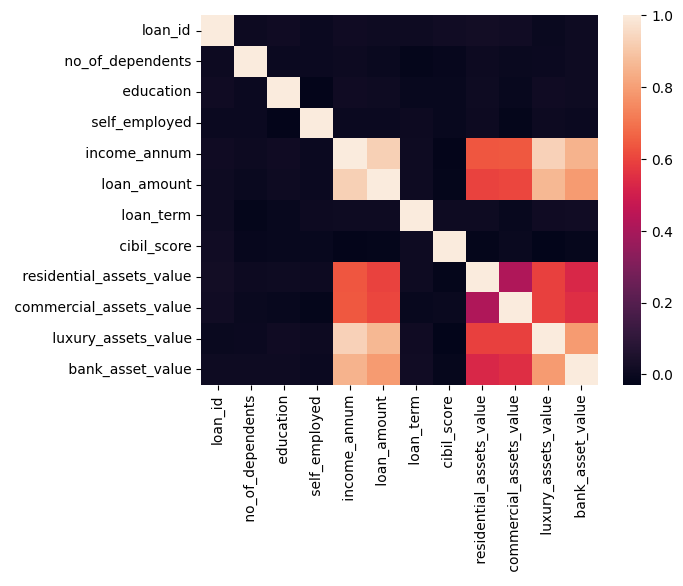

In [419]:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr())

## 4. Desbalanceo de Clases

###Pregunta práctica. Comparacion de Modelos de Clasificacion

Decisi´on para predecir el estado del pr´estamo (loan status). Compara los modelos utilizando la
m´etrica ROC AUC. Para esto, sigue los pasos:
• Preprocesa los datos (conversi´on de variables categ´oricas, manejo de valores faltantes).
• Divide los datos en un conjunto de entrenamiento y uno de prueba.
• Entrena los modelos de Regresi´on Log´ıstica y ´Arbol de Decisi´on.
• Hay alguna evidencia de overfitting si/no .
• Calcula la m´etrica ROC AUC para cada modelo y comp´aralos.
• Si detectas desbalanceo de clases, aplica SMOTE para equilibrar el dataset antes de entrenar los
modelos.


In [420]:
x = df[[' income_annum',' loan_amount',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value']].values
y = df[' loan_status']

In [421]:
# Dividir en train y test con estratificación
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42) #x changed to x

print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

# Mostrar la distribución de clases en el conjunto de entrenamiento
print("Distribución de clases en entrenamiento (proporciones):")
print(y_train.value_counts(normalize=True))

Dimensiones del conjunto de entrenamiento: (3201, 6)
Dimensiones del conjunto de prueba: (1068, 6)
Distribución de clases en entrenamiento (proporciones):
 loan_status
Approved    0.622306
Rejected    0.377694
Name: proportion, dtype: float64


In [422]:
# Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Regresión Logística
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

Reporte de Clasificación - Árbol de Decisión (Test):
              precision    recall  f1-score   support

    Approved       0.64      0.62      0.63       664
    Rejected       0.41      0.42      0.41       404

    accuracy                           0.55      1068
   macro avg       0.52      0.52      0.52      1068
weighted avg       0.55      0.55      0.55      1068

Reporte de Clasificación - Regresión Logística (Test):
              precision    recall  f1-score   support

    Approved       0.62      1.00      0.77       664
    Rejected       0.80      0.01      0.02       404

    accuracy                           0.62      1068
   macro avg       0.71      0.50      0.39      1068
weighted avg       0.69      0.62      0.48      1068



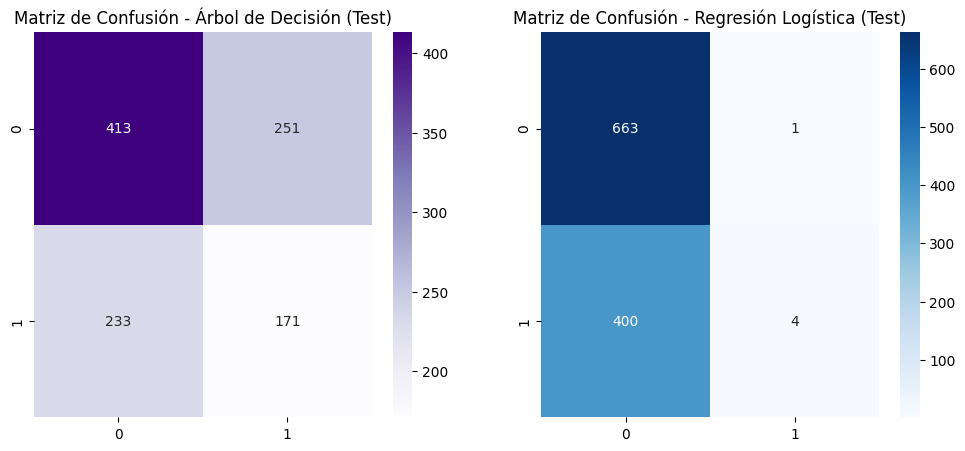

Reporte de Clasificación - Árbol de Decisión (Train):
              precision    recall  f1-score   support

    Approved       1.00      1.00      1.00      1992
    Rejected       1.00      1.00      1.00      1209

    accuracy                           1.00      3201
   macro avg       1.00      1.00      1.00      3201
weighted avg       1.00      1.00      1.00      3201

Reporte de Clasificación - Regresión Logística (Train):
              precision    recall  f1-score   support

    Approved       0.62      0.99      0.77      1992
    Rejected       0.40      0.01      0.01      1209

    accuracy                           0.62      3201
   macro avg       0.51      0.50      0.39      3201
weighted avg       0.54      0.62      0.48      3201



In [423]:
## Evaluación en el conjunto de prueba
# Predicciones en test
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("Reporte de Clasificación - Árbol de Decisión (Test):")
print(classification_report(y_test, y_pred_dt))

print("Reporte de Clasificación - Regresión Logística (Test):")
print(classification_report(y_test, y_pred_lr))

# Matrices de Confusión
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=ax[0], cmap='Purples')
ax[0].set_title("Matriz de Confusión - Árbol de Decisión (Test)")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title("Matriz de Confusión - Regresión Logística (Test)")
plt.show()

## Evaluación en el conjunto de entrenamiento para detectar overfitting
y_pred_train_dt = dt_model.predict(X_train)
y_pred_train_lr = lr_model.predict(X_train)

print("Reporte de Clasificación - Árbol de Decisión (Train):")
print(classification_report(y_train, y_pred_train_dt))

print("Reporte de Clasificación - Regresión Logística (Train):")
print(classification_report(y_train, y_pred_train_lr))

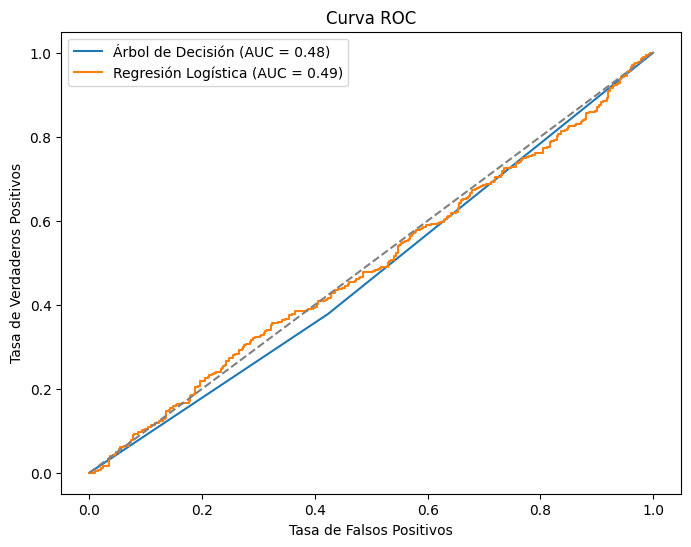

In [424]:
# Obtener probabilidades en test
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Convertir y_test a valores numéricos (0 o 1)
# Asumiendo que ' Approved' es la clase positiva (1)
y_test_numeric = y_test.map({' Approved': 1, ' Rejected': 0}) #added this line to map to numeric

# Calcular ROC y AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test_numeric, y_prob_dt) #changed y_test to y_test_numeric
fpr_lr, tpr_lr, _ = roc_curve(y_test_numeric, y_prob_lr) #changed y_test to y_test_numeric
auc_dt = auc(fpr_dt, tpr_dt)
auc_lr = auc(fpr_lr, tpr_lr)

# Graficar ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Árbol de Decisión (AUC = {auc_dt:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Regresión Logística (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

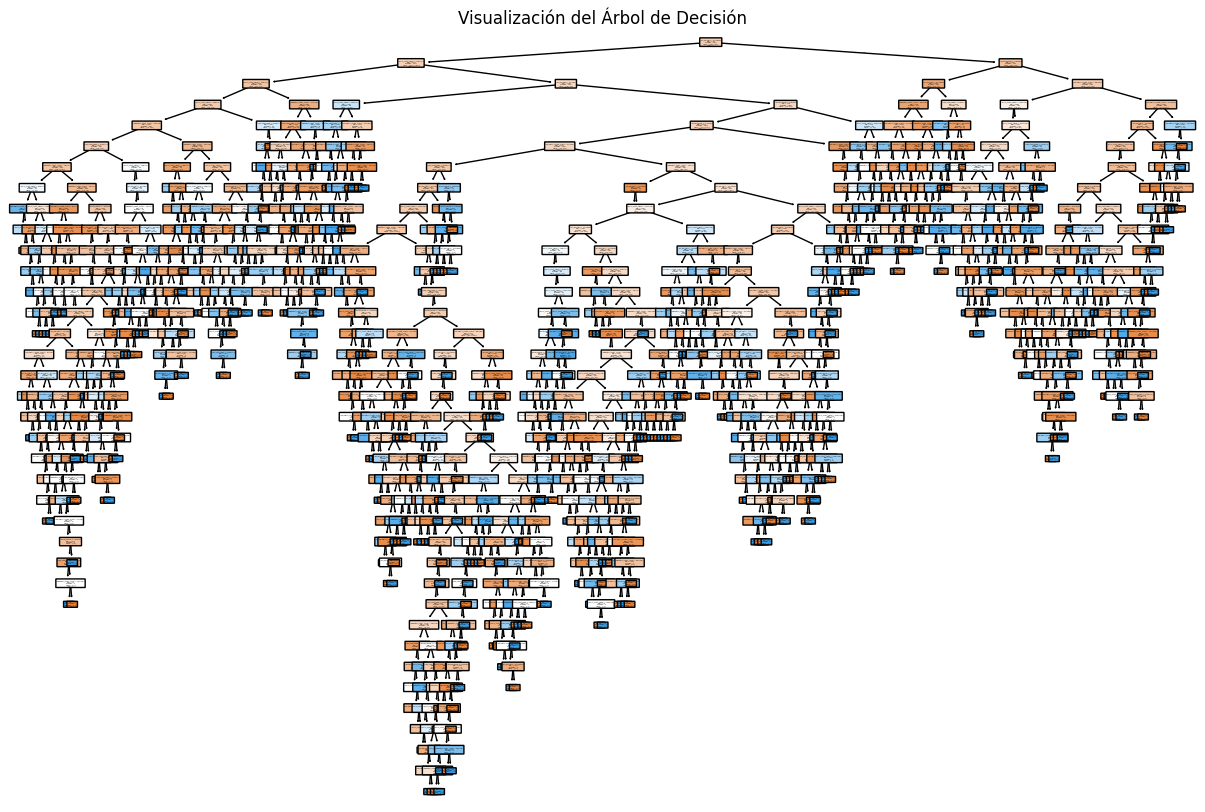

In [425]:
!pip install scikit-learn
import matplotlib.pyplot as plt # Assuming you have already imported matplotlib.pyplot
from sklearn.tree import plot_tree  # Import the plot_tree function

plt.figure(figsize=(15,10))
# Use the column names directly as feature_names
feature_names = [' income_annum',' loan_amount',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value'] #added this line with feature names
plot_tree(dt_model, feature_names=feature_names, class_names=["0", "1"], filled=True, rounded=True) # changed x.columns to feature_names
plt.title("Visualización del Árbol de Decisión")
plt.show()

In [426]:
dt_model_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [427]:
y_pred_pruned = dt_model_pruned.predict(X_test)
y_pred_train_pruned = dt_model_pruned.predict(X_train)

print("Reporte de Clasificación - Árbol de Decisión (Train):")
print(classification_report(y_train, y_pred_train_pruned))

Reporte de Clasificación - Árbol de Decisión (Train):
              precision    recall  f1-score   support

    Approved       0.65      0.97      0.78      1992
    Rejected       0.71      0.13      0.21      1209

    accuracy                           0.65      3201
   macro avg       0.68      0.55      0.49      3201
weighted avg       0.67      0.65      0.56      3201



In [428]:
# Print the classification report
print(classification_report(y_test, y_pred_pruned))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_pruned))

              precision    recall  f1-score   support

    Approved       0.63      0.94      0.76       664
    Rejected       0.51      0.10      0.17       404

    accuracy                           0.62      1068
   macro avg       0.57      0.52      0.46      1068
weighted avg       0.59      0.62      0.53      1068

[[625  39]
 [363  41]]


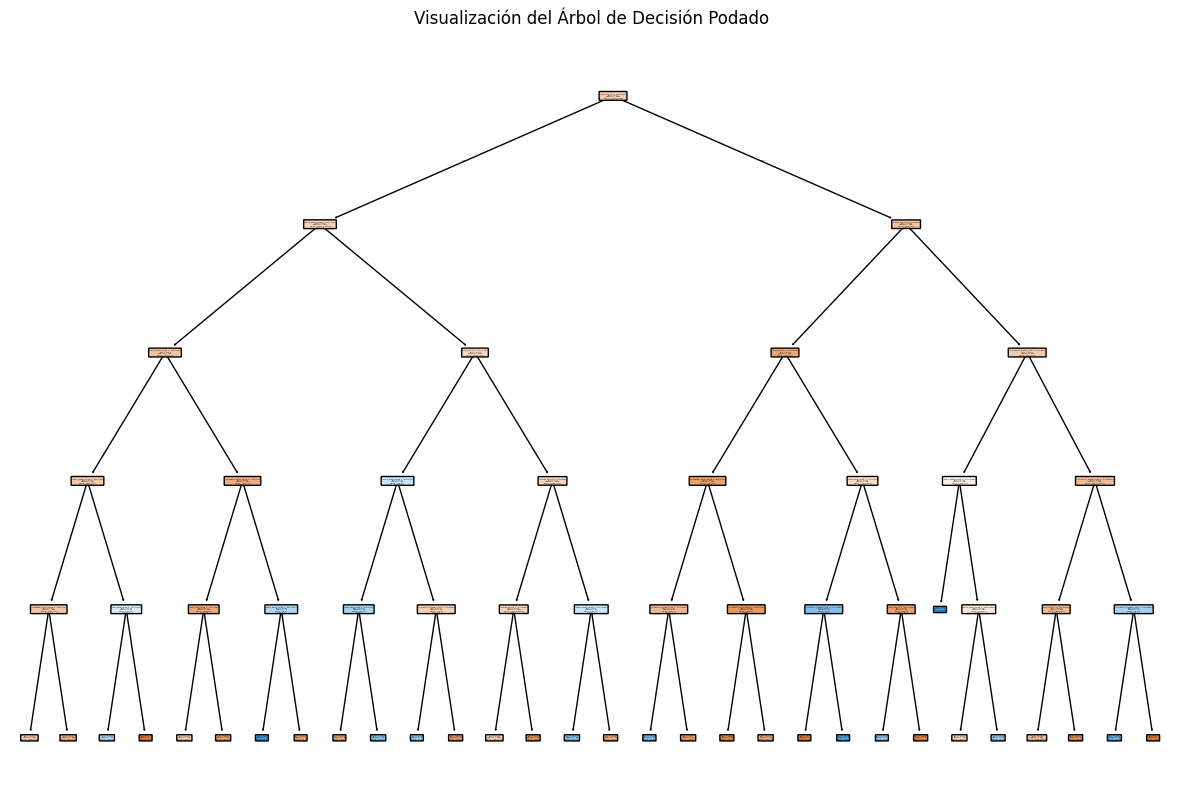

In [429]:
plt.figure(figsize=(15, 10))
# Use the defined feature_names from previous cells
feature_names = [' income_annum',' loan_amount',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value']
plot_tree(dt_model_pruned, feature_names=feature_names, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión Podado")
plt.show()

## 5. Desempeño

###Preguntas prácticas. Evaluacion del Desempeño del Modelo
Responde las siguientes preguntas:
* ¿Qu´e modelo tiene el mejor desempe˜no general? Justifica tu respuesta utilizando las m´etricas.

El árbol de decisión podado tuvo un rendimiento general ligeramente mejor, según el AUC ROC y las métricas del informe de clasificación, a la vez que solucionó el sobreajuste.
* ¿C´omo impacta el desbalanceo de clases en la m´etrica ROC AUC y en otras m´etricas?

El desequilibrio de clases puede generar un AUC ROC engañosamente alto y distorsionar otras métricas como la precisión. También puede provocar un rendimiento deficiente en la clase minoritaria, como lo indican la baja precisión y recuperación
* ¿Qu´e acciones tomar´ıas si el modelo tiene un alto sesgo hacia la clase mayoritaria?

Las técnicas de remuestreo como SMOTE y submuestreo pueden ayudar a solucionar el sesgo de un modelo hacia la clase mayoritaria.


###6. Reflexión
Despu´es de completar los ejercicios, reflexiona sobre los siguientes puntos:

- ¿Qu´e desaf´ıos enfrentaste al trabajar con los datos proporcionados? Uno de los principales desafíos fue identificar y tratar el desbalanceo de clases, que afectaba la calidad de las predicciones. También fue necesario analizar cuidadosamente qué variables realmente aportaban valor al modelo, ya que algunas tenían muy baja correlación con la variable objetivo.
- ¿Qu´e mejorar´ıas en el proceso de preprocesamiento de datos? Mejoraría la limpieza de los datos y la selección de variables. Por ejemplo, podría eliminar columnas que no aportan al modelo y normalizar los datos numéricos para que todos tengan el mismo rango.
Si pudieras recolectar m´as datos, ¿qu´e variables adicionales ser´ıan ´utiles para mejorar el modelo de clasificaci´on? Sería útil tener información más detallada del comportamiento del cliente, como el número de veces que contacta al servicio al cliente, si ha tenido problemas recientes o cuánto tiempo lleva como cliente.
- ¿C´omo asegurar´ıas que el modelo generalice bien y no est´e sobreajustado? Usaría validación cruzada y probaría con modelos más simples para evitar que el modelo memorice los datos. También compararía los resultados del entrenamiento con los de prueba.
- ¿Qu´e impacto tuvo el desbalanceo de clases en la precisi´on de tu modelo? ¿C´omo se resolvi´o con SMOTE? El desbalance hizo que el modelo predijera casi siempre la clase mayoritaria, lo que afectaba su capacidad de detectar a los clientes que se iban. Con SMOTE se equilibraron las clases y el modelo pudo aprender mejor sobre la clase minoritaria.
- ¿C´omo detectar´ıas y manejar´ıas el overfitting en un modelo de Machine Learning? ¿Qu´e t´ecnicas implementar´ıas para mejorar la capacidad de generalizaci´on? Detectaría el overfitting si el modelo tiene muy buen resultado en entrenamiento pero malo en prueba. Para evitarlo, usaría validación cruzada para evaluar la estabilidad del modelo y asegurar que el aprendizaje no esté limitado solo al conjunto de entrenamiento.